In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
idx = pd.IndexSlice
deciles = np.arange(.1, 1, .1).round(1)

In [5]:
DATA_STORE = Path('data', 'assets.h5')

with pd.HDFStore(DATA_STORE) as store:
    data = (store['quandl/wiki/prices']
            .loc[idx['2007':'2016', :], ['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']]
            .dropna().swaplevel().sort_index().rename(columns=lambda x: x.replace('adj_', '')))
    metadata = store['us_equities/stocks'].loc[:, ['marketcap', 'sector']]
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6951874 entries, ('A', Timestamp('2007-01-03 00:00:00')) to ('ZUMZ', Timestamp('2016-12-30 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   open    6951874 non-null  float64
 1   high    6951874 non-null  float64
 2   low     6951874 non-null  float64
 3   close   6951874 non-null  float64
 4   volume  6951874 non-null  float64
dtypes: float64(5)
memory usage: 292.5+ MB


In [92]:
metadata.sector = pd.factorize(metadata.sector)[0]
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6834 entries, PIH to ZYME
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  5766 non-null   float64
 1   sector     6834 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 160.2+ KB


In [93]:
metadata[0:5]

,marketcap,sector
ticker,,
PIH,43090000.0,0
PIHPP,NaN,0
TURN,70330000.0,0
FLWS,833390000.0,1
FCCY,178140000.0,0


In [94]:
data.tail(5)

open     high     low  close    volume
ticker date                                               
ZUMZ   2016-12-23  20.95  21.5000  20.950  21.35  532292.0
       2016-12-27  21.20  21.7000  21.200  21.45  308004.0
       2016-12-28  21.55  21.7499  21.325  21.45  165827.0
       2016-12-29  21.55  22.0500  21.400  21.90  322108.0
       2016-12-30  21.90  22.1900  21.600  21.85  295429.0

In [95]:
data = data.join(metadata).dropna(subset=['sector']) # drop NaN in sector column

In [96]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5395695 entries, ('A', Timestamp('2007-01-03 00:00:00')) to ('ZUMZ', Timestamp('2016-12-30 00:00:00'))
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   open       5395695 non-null  float64
 1   high       5395695 non-null  float64
 2   low        5395695 non-null  float64
 3   close      5395695 non-null  float64
 4   volume     5395695 non-null  float64
 5   marketcap  5385154 non-null  float64
 6   sector     5395695 non-null  float64
dtypes: float64(7)
memory usage: 309.5+ MB


In [97]:
print(f"# Tickers: {len(data.index.unique('ticker')):,.0f} | # Dates: {len(data.index.unique('date')):,.0f}")

# Tickers: 2,399 | # Dates: 2,547


In [98]:
dv = data.close.mul(data.volume)
top500 = (dv.groupby(level='date').rank(ascending=False).unstack('ticker').dropna(thresh=8*252, axis=1)
          .mean().nsmallest(500))

In [99]:
top500.tail(5)

ticker
DDR     564.748610
NVR     565.641779
O       568.160842
TRN     569.928912
NYCB    570.510326
dtype: float64

In [100]:
data.close.mul(data.volume).unstack('ticker').div(1e6).tail(10)

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2013-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


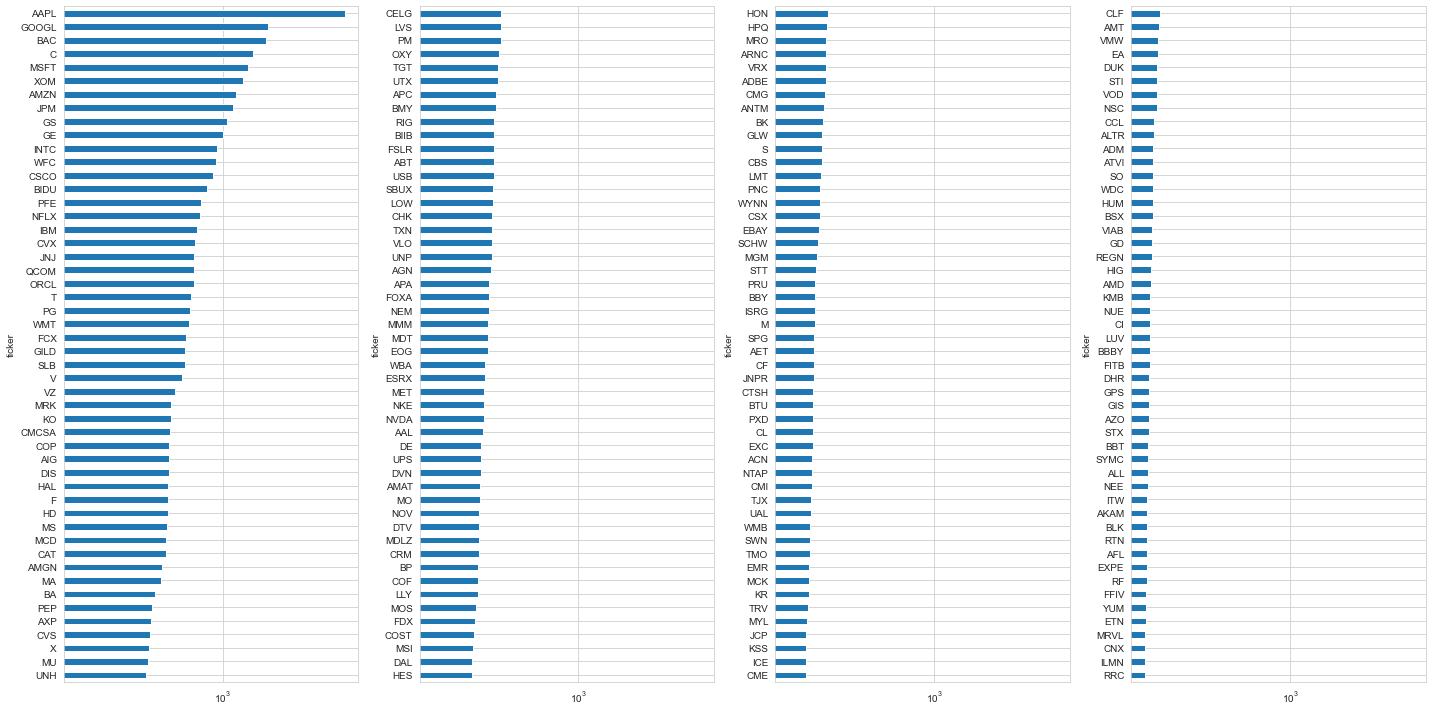

In [101]:
# Visualize the 200 most liquid stocks
top200 = (data.close.mul(data.volume).unstack('ticker').dropna(thresh=8*252, axis=1).mean().div(1e6)
          .nlargest(200))
cutoffs = [0, 50, 100, 150, 200]
fig, axes = plt.subplots(ncols=4, figsize=(20, 10), sharex=True)
axes = axes.flatten()

for i, cutoff in enumerate(cutoffs[1:], 1):
    top200.iloc[cutoffs[i-1]:cutoffs[i]].sort_values().plot.barh(logx=True, ax=axes[i-1])
fig.tight_layout()

In [102]:
to_drop = data.index.unique('ticker').difference(top500.index)
len(to_drop)

1899

In [103]:
data = data.drop(to_drop, level='ticker')
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1256095 entries, ('A', Timestamp('2007-01-03 00:00:00')) to ('ZION', Timestamp('2016-12-30 00:00:00'))
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   open       1256095 non-null  float64
 1   high       1256095 non-null  float64
 2   low        1256095 non-null  float64
 3   close      1256095 non-null  float64
 4   volume     1256095 non-null  float64
 5   marketcap  1253855 non-null  float64
 6   sector     1256095 non-null  float64
dtypes: float64(7)
memory usage: 72.6+ MB


In [104]:
data.index.unique('ticker')

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'XEC', 'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'YUM', 'ZBH', 'ZION'],
      dtype='object', name='ticker', length=500)

In [105]:
print(f"# Tickers: {len(data.index.unique('ticker')):,.0f} | # Dates: {len(data.index.unique('date')):,.0f}")

# Tickers: 500 | # Dates: 2,518


In [106]:
# Remove outlier observations based on daily returns
before = len(data)
data['ret'] = data.groupby('ticker').close.pct_change()
data = data[data.ret.between(-1, 1)].drop('ret', axis=1)
print(f'Dropped {before-len(data):,.0f}')

tickers = data.index.unique('ticker')
print(f"# Tickers: {len(tickers):,.0f} | # Dates: {len(data.index.unique('date')):,.0f}")

Dropped 502
# Tickers: 500 | # Dates: 2,517


In [107]:
# Sample price data for illustration
ticker = 'AAPL' # np.random.choice(tickers)
price_sample = data.loc[idx[ticker, :], :].reset_index('ticker', drop=True)
price_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2007-01-04 to 2016-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2517 non-null   float64
 1   high       2517 non-null   float64
 2   low        2517 non-null   float64
 3   close      2517 non-null   float64
 4   volume     2517 non-null   float64
 5   marketcap  2517 non-null   float64
 6   sector     2517 non-null   float64
dtypes: float64(7)
memory usage: 157.3 KB


In [108]:
price_sample.tail(10)

,open,high,low,close,volume,marketcap,sector
date,,,,,,,
2016-12-16,115.031425,115.061055,114.216615,114.537601,44351134.0,9.039900e+11,2.0
2016-12-19,114.369701,115.930186,114.320318,115.199326,27779423.0,9.039900e+11,2.0
2016-12-20,115.298090,116.048703,115.238832,115.505497,21424965.0,9.039900e+11,2.0
2016-12-21,115.357349,115.949938,115.337596,115.614138,23783165.0,9.039900e+11,2.0
2016-12-22,114.912908,115.070931,114.211677,114.853649,26085854.0,9.039900e+11,2.0
2016-12-23,114.162295,115.080808,114.162295,115.080808,14249484.0,9.039900e+11,2.0
2016-12-27,115.080808,116.344998,115.051178,115.811668,18296855.0,9.039900e+11,2.0
2016-12-28,116.068456,116.558923,114.764760,115.317843,20905892.0,9.039900e+11,2.0
2016-12-29,115.011672,115.663027,114.962290,115.288214,15039519.0,9.039900e+11,2.0


In [109]:
price_sample.to_hdf('data/data_alpha_factor.h5', 'data/sample')

In [110]:
# Compute returns
by_ticker = data.groupby(level='ticker')

# For Historical returns
T = [1, 2, 3, 4, 5, 10, 21, 42, 63, 126, 252]
for t in T:
    data[f'ret_{t:02}'] = by_ticker.close.pct_change(t)

# For Forward returns
data['ret_fwd'] = by_ticker.ret_01.shift(-1)
data = data.dropna(subset=['ret_fwd'])

data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1255093 entries, ('A', Timestamp('2007-01-04 00:00:00')) to ('ZION', Timestamp('2016-12-29 00:00:00'))
Data columns (total 19 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   open       1255093 non-null  float64
 1   high       1255093 non-null  float64
 2   low        1255093 non-null  float64
 3   close      1255093 non-null  float64
 4   volume     1255093 non-null  float64
 5   marketcap  1252855 non-null  float64
 6   sector     1255093 non-null  float64
 7   ret_01     1254593 non-null  float64
 8   ret_02     1254093 non-null  float64
 9   ret_03     1253593 non-null  float64
 10  ret_04     1253093 non-null  float64
 11  ret_05     1252593 non-null  float64
 12  ret_10     1250093 non-null  float64
 13  ret_21     1244593 non-null  float64
 14  ret_42     1234093 non-null  float64
 15  ret_63     1223593 non-null  float64
 16  ret_126    1192093 non-null  float64
 17  ret_252    

In [111]:
pd.concat([data.head(5), data.tail(5)])

open       high        low      close     volume  \
ticker date                                                                
A      2007-01-04  23.400856  23.605528  22.827773  23.475902  2073700.0   
       2007-01-05  23.400856  23.469080  23.196183  23.257585  2676600.0   
       2007-01-08  23.182539  23.250763  22.977866  23.175716  1557200.0   
       2007-01-09  23.250763  23.414500  22.943754  23.203006  1386200.0   
       2007-01-10  23.223473  23.223473  22.766372  22.991511  2157400.0   
ZION   2016-12-22  43.341979  43.669875  42.934592  43.461214  1555955.0   
       2016-12-23  43.500959  43.659939  43.309189  43.580449  1243449.0   
       2016-12-27  43.818919  43.868601  43.391660  43.650003  1096332.0   
       2016-12-28  43.749366  43.749366  42.904783  43.004146  1055176.0   
       2016-12-29  42.994210  43.361851  42.358289  42.517269  1551615.0   

                      marketcap  sector    ret_01    ret_02    ret_03  \
ticker date                                                             
A      2007-01-04  1.960000e+10     4.0       NaN       NaN       NaN   
       2007-01-05  1.960000e+10     4.0 -0.009300       NaN       NaN   
       2007-01-08  1.960000e+10     4.0 -0.003520 -0.012787       NaN   
       2007-01-09  1.960000e+10     4.0  0.001178 -0.002347 -0.011625   
       2007-01-10  1.960000e+10     4.0 -0.009115 -0.007948 -0.011440   
ZION   2016-12-22  1.032000e+10     0.0  0.002291 -0.003872  0.024356   
       2016-12-23  1.032000e+10     0.0  0.002743  0.005041 -0.001139   
       2016-12-27  1.032000e+10     0.0  0.001596  0.004344  0.006645   
       2016-12-28  1.032000e+10     0.0 -0.014796 -0.013224 -0.010517   
       2016-12-29  1.032000e+10     0.0 -0.011322 -0.025950 -0.024396   

                     ret_04    ret_05    ret_10    ret_21    ret_42    ret_63  \
ticker date                                                                     
A      2007-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
       2007-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
       2007-01-08       NaN       NaN       NaN       NaN       NaN       NaN   
       2007-01-09       NaN       NaN       NaN       NaN       NaN       NaN   
       2007-01-10 -0.020634       NaN       NaN       NaN       NaN       NaN   
ZION   2016-12-22  0.040685  0.016264  0.015085  0.131402  0.351559  0.431919   
       2016-12-23  0.027166  0.043540  0.014573  0.121166  0.370053  0.464067   
       2016-12-27  0.000455  0.028806  0.034377  0.123529  0.369678  0.447598   
       2016-12-28 -0.008249 -0.014348  0.024864  0.126790  0.339410  0.405838   
       2016-12-29 -0.021719 -0.019478  0.013981  0.111429  0.336213  0.404950   

                    ret_126   ret_252   ret_fwd  
ticker date                                      
A      2007-01-04       NaN       NaN -0.009300  
       2007-01-05       NaN       NaN -0.003520  
       2007-01-08       NaN       NaN  0.001178  
       2007-01-09       NaN       NaN -0.009115  
       2007-01-10       NaN       NaN  0.000000  
ZION   2016-12-22  0.737979  0.596533  0.002743  
       2016-12-23  0.868337  0.594574  0.001596  
       2016-12-27  0.809939  0.605208 -0.014796  
       2016-12-28  0.740346  0.571790 -0.011322  
       2016-12-29  0.711057  0.573229  0.005842

In [112]:
data.to_hdf('data/data_alpha_factor.h5', 'data/top500')